# Predicción de Precios de Vehículos Usados

### Objetivo:
El objetivo de este ejercicio es predecir el precio de vehículos usados basándose en sus
características utilizando técnicas de regresión en Python con scikit-learn.

### Dataset:
Utilizaremos el dataset "Automobile Dataset" disponible en UCI Machine Learning
Repository. Este dataset contiene información sobre diferentes características de
vehículos y sus precios.

### Descripción del Dataset:
El dataset contiene las siguientes columnas:
- `symboling`: Clasificación del riesgo de seguro.
- `normalized-losses`: Pérdidas normalizadas por riesgo de seguro.
- `make`: Marca del vehículo.
- `fuel-type`: Tipo de combustible.
- `aspiration`: Tipo de aspiración.
- `num-of-doors`: Número de puertas.
- `body-style`: Estilo de carrocería.
- `drive-wheels`: Tipo de tracción.
- `engine-location`: Ubicación del motor.
- `wheel-base`: Distancia entre ejes.
- `length`: Longitud del vehículo.
- `width`: Ancho del vehículo.
- `height`: Altura del vehículo.
- `curb-weight`: Peso en vacío.
- `engine-type`: Tipo de motor.
- `num-of-cylinders`: Número de cilindros.
- `engine-size`: Tamaño del motor.
- `fuel-system`: Sistema de combustible.
- `bore`: Diámetro del cilindro.
- `stroke`: Carrera del cilindro.
- `compression-ratio`: Relación de compresión.
- `horsepower`: Potencia del motor.
- `peak-rpm`: Revoluciones por minuto máximas.
- `city-mpg`: Consumo en ciudad.
- `highway-mpg`: Consumo en carretera.
- `price`: Precio del vehículo (variable objetivo).

In [122]:
%pip install datasets numpy pandas ipywidgets nbformat scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### 1. Análisis Exploratorio de Datos (EDA)

Cargar el dataset y mostrar las primeras filas

In [123]:
%pip install ucimlrepo


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [124]:
from ucimlrepo import fetch_ucirepo  # type: ignore
  
# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
df_X = automobile.data.features 
df_y = automobile.data.targets 

df = df_X

df.head()


price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore fuel-system  engine-size  ...  length wheel-base  \
0    2.68  3.47        mpfi          130  ...   168.8       88.6   
1    2.68  3.47        mpfi          130  ...   168.8       88.6   
2    3.47  2.68        mpfi          152  ...   171.2       94.5   
3    3.40  3.19        mpfi          109  ...   176.6       99.8   
4    3.40  3.19        mpfi          136  ...   176.6       99.4   

   engine-location  drive-wheels   body-style  num-of-doors  aspiration  \
0            front           rwd  convertible           2.0         std   
1            front           rwd  convertible           2.0         std   
2            front           rwd    hatchback           2.0         std   
3            front           fwd        sedan           4.0         std   
4            front           4wd        sedan           4.0         std   

  fuel-type         make normalized-losses  
0       gas  alfa-romero               NaN  
1       gas  alfa-romero               NaN  
2       gas  alfa-romero               NaN  
3       gas         audi             164.0  
4       gas         audi             164.0  

[5 rows x 25 columns]

Describir estadísticamente las características del dataset


In [37]:
df.columns

Index(['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower',
       'compression-ratio', 'stroke', 'bore', 'fuel-system', 'engine-size',
       'num-of-cylinders', 'engine-type', 'curb-weight', 'height', 'width',
       'length', 'wheel-base', 'engine-location', 'drive-wheels', 'body-style',
       'num-of-doors', 'aspiration', 'fuel-type', 'make', 'normalized-losses'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [22]:
df.describe()

price  highway-mpg    city-mpg     peak-rpm  horsepower  \
count    201.000000   205.000000  205.000000   203.000000  203.000000   
mean   13207.129353    30.751220   25.219512  5125.369458  104.256158   
std     7947.066342     6.886443    6.542142   479.334560   39.714369   
min     5118.000000    16.000000   13.000000  4150.000000   48.000000   
25%     7775.000000    25.000000   19.000000  4800.000000   70.000000   
50%    10295.000000    30.000000   24.000000  5200.000000   95.000000   
75%    16500.000000    34.000000   30.000000  5500.000000  116.000000   
max    45400.000000    54.000000   49.000000  6600.000000  288.000000   

       compression-ratio      stroke        bore  engine-size  \
count         205.000000  201.000000  201.000000   205.000000   
mean           10.142537    3.255423    3.329751   126.907317   
std             3.972040    0.316717    0.273539    41.642693   
min             7.000000    2.070000    2.540000    61.000000   
25%             8.600000    3.110000    3.150000    97.000000   
50%             9.000000    3.290000    3.310000   120.000000   
75%             9.400000    3.410000    3.590000   141.000000   
max            23.000000    4.170000    3.940000   326.000000   

       num-of-cylinders  curb-weight      height       width      length  \
count        205.000000   205.000000  205.000000  205.000000  205.000000   
mean           4.380488  2555.565854   53.724878   65.907805  174.049268   
std            1.080854   520.680204    2.443522    2.145204   12.337289   
min            2.000000  1488.000000   47.800000   60.300000  141.100000   
25%            4.000000  2145.000000   52.000000   64.100000  166.300000   
50%            4.000000  2414.000000   54.100000   65.500000  173.200000   
75%            4.000000  2935.000000   55.500000   66.900000  183.100000   
max           12.000000  4066.000000   59.800000   72.300000  208.100000   

       wheel-base  num-of-doors  normalized-losses  
count  205.000000    203.000000         164.000000  
mean    98.756585      3.123153         122.000000  
std      6.021776      0.994841          35.442168  
min     86.600000      2.000000          65.000000  
25%     94.500000      2.000000          94.000000  
50%     97.000000      4.000000         115.000000  
75%    102.400000      4.000000         150.000000  
max    120.900000      4.000000         256.000000

Visualizar la distribución de las características utilizando histogramas

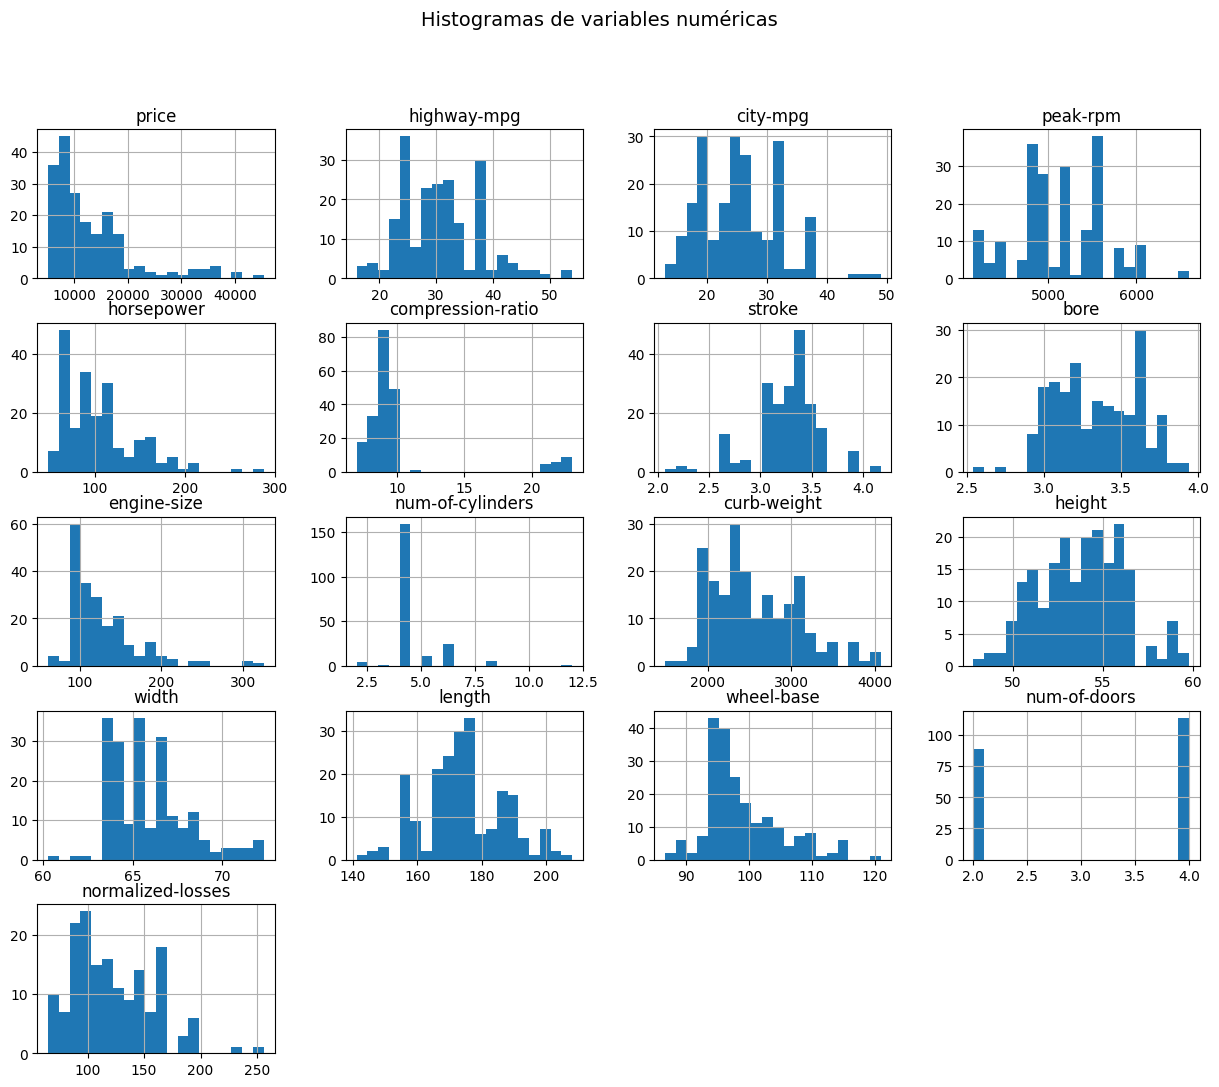

In [24]:
from seaborn.axisgrid import plt

df.hist(figsize=(15, 12), bins=20)
plt.suptitle('Histogramas de variables numéricas', fontsize=14)
plt.show()

Visualizar la distribución de las características utilizando diagramas de caja (boxplots)

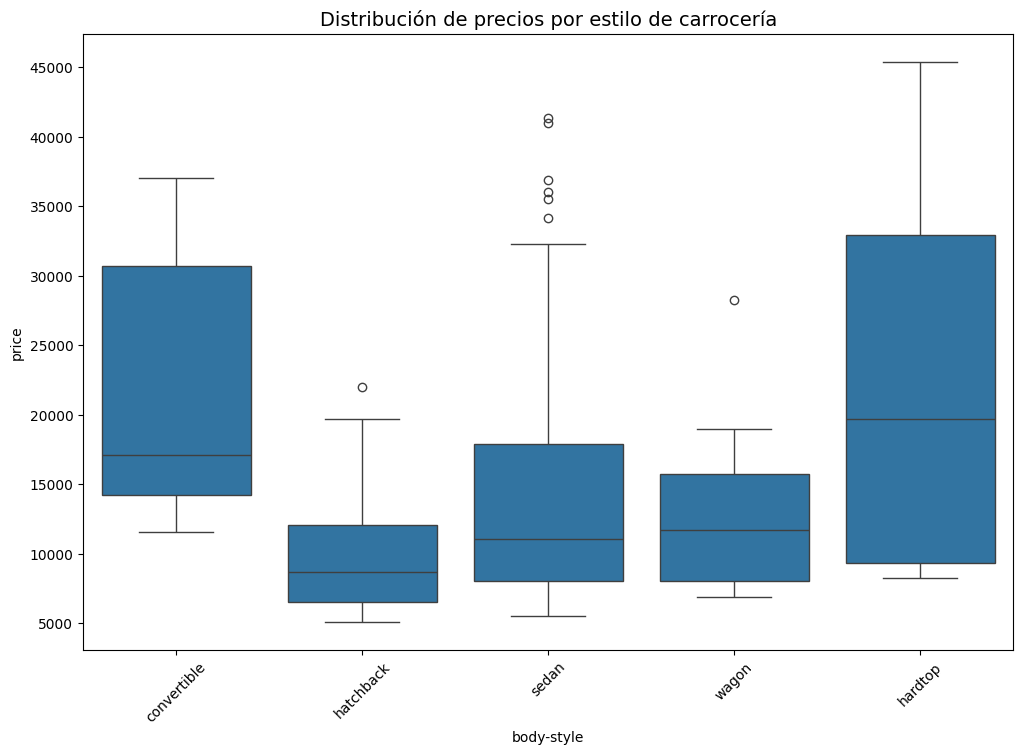

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='body-style', y='price') # type: ignore
plt.title('Distribución de precios por estilo de carrocería', fontsize=14)
plt.xticks(rotation=45)
plt.show()

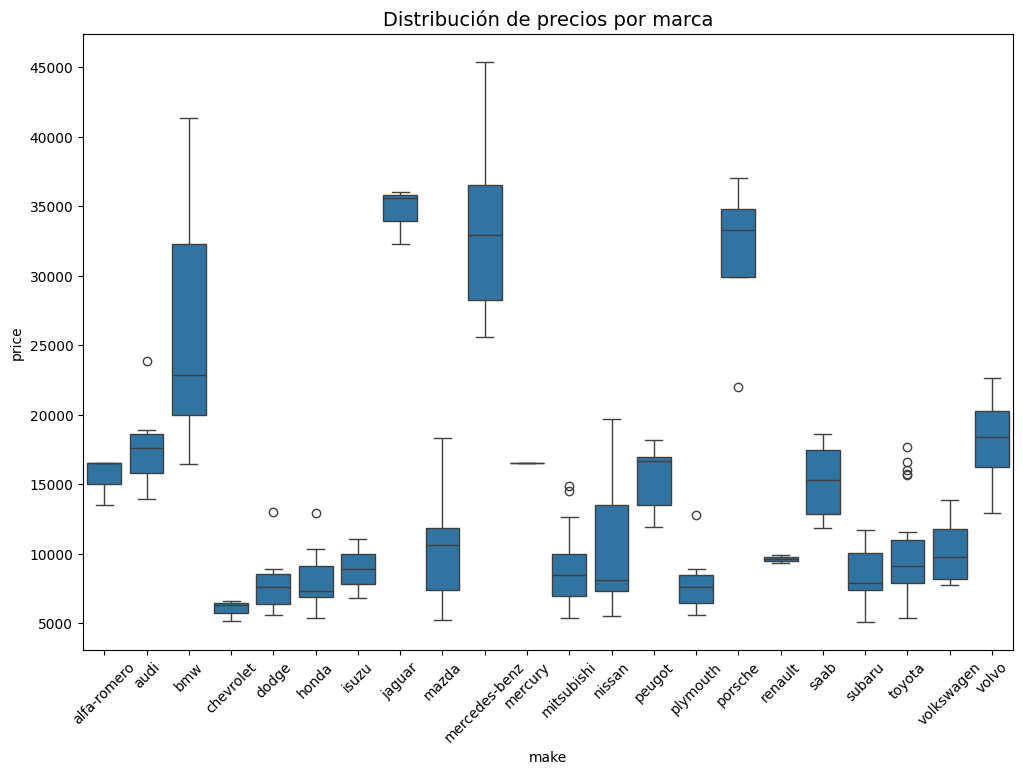

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='make', y='price') # type: ignore
plt.title('Distribución de precios por marca', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Analizar las correlaciones entre las variables utilizando un mapa de calor (heatmap)

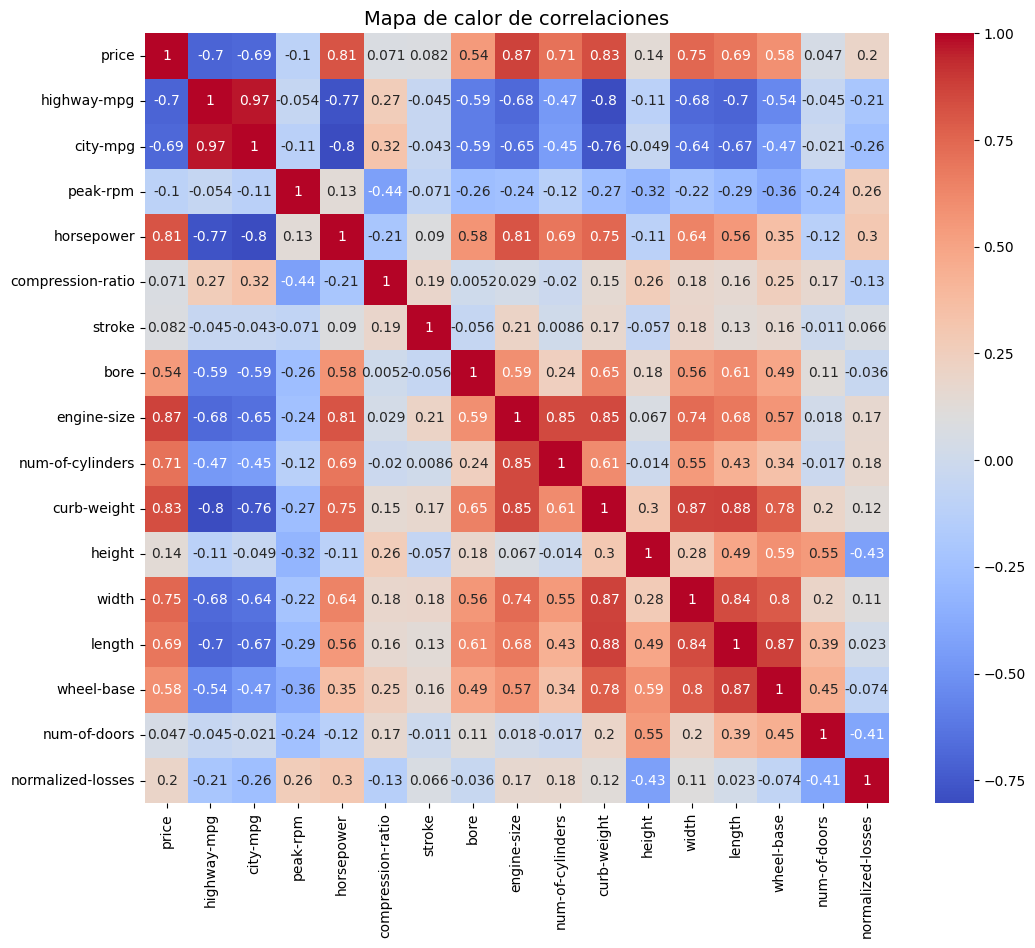

In [38]:
corr = df.drop(['fuel-system','make','body-style','fuel-type','engine-location','drive-wheels','aspiration','engine-type'],axis=1).corr()
#corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm') # type: ignore
plt.title('Mapa de calor de correlaciones', fontsize=14)
plt.show()

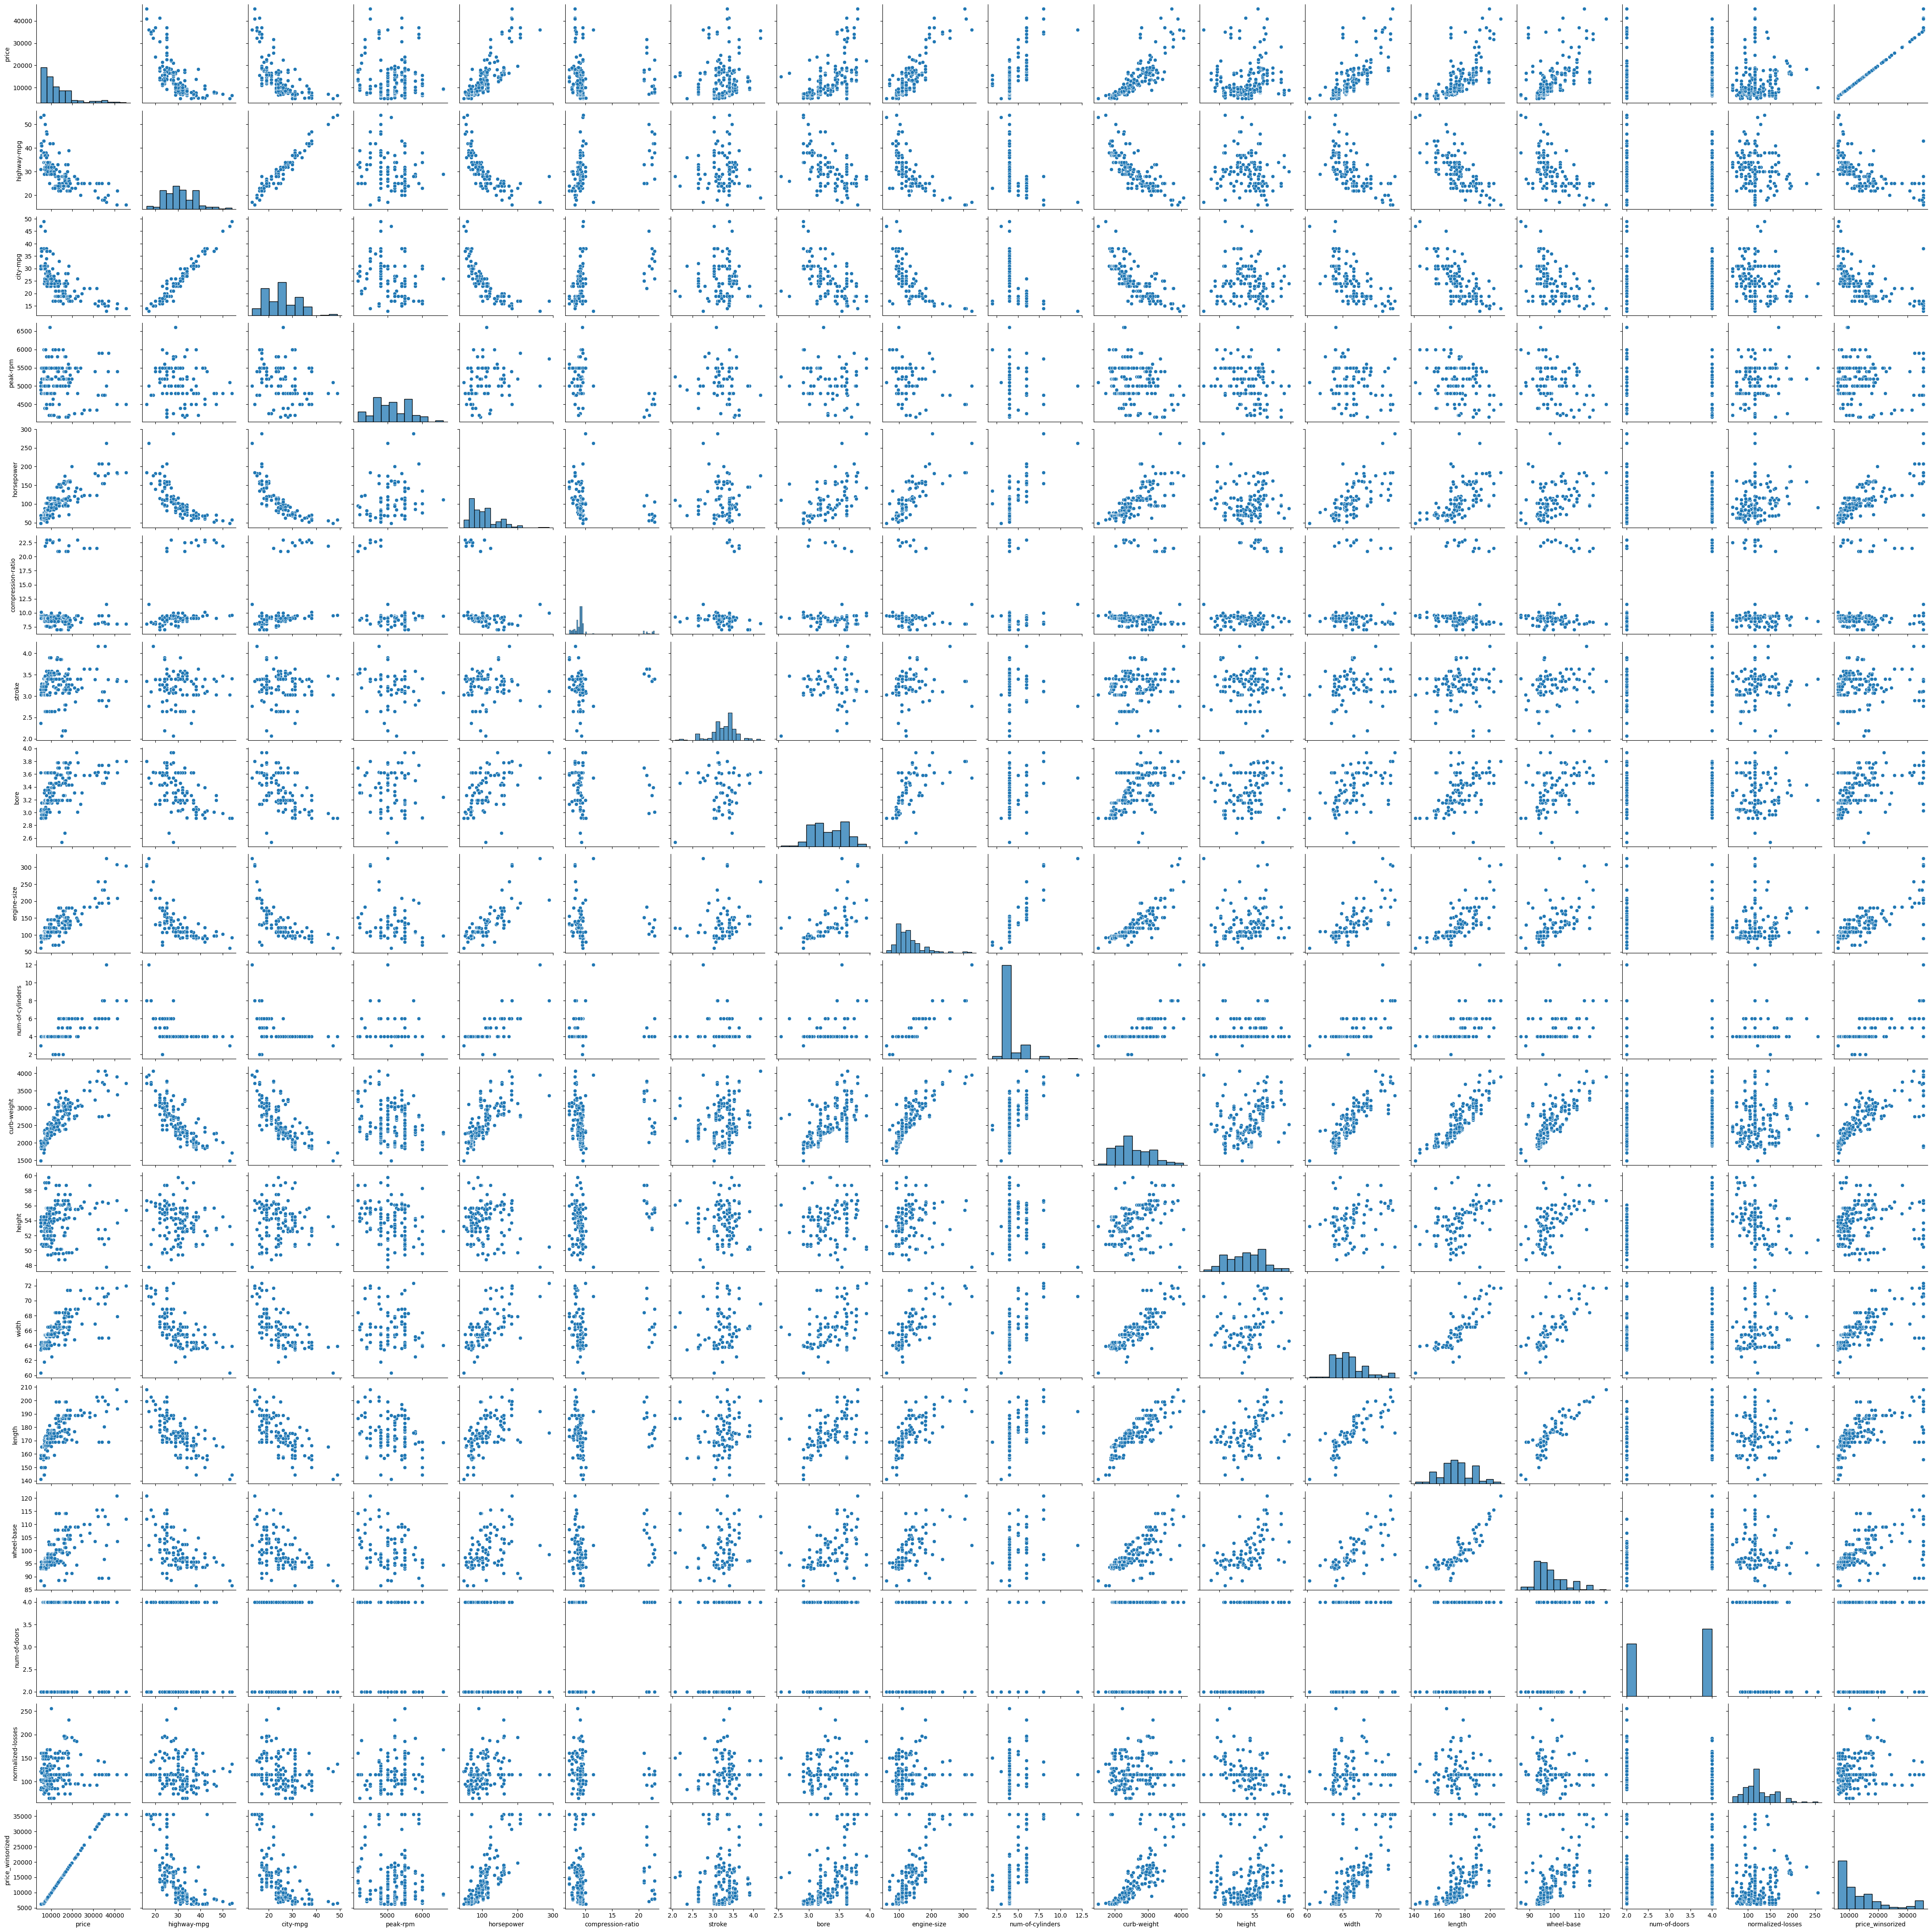

In [68]:
sns.pairplot(df) # type: ignore

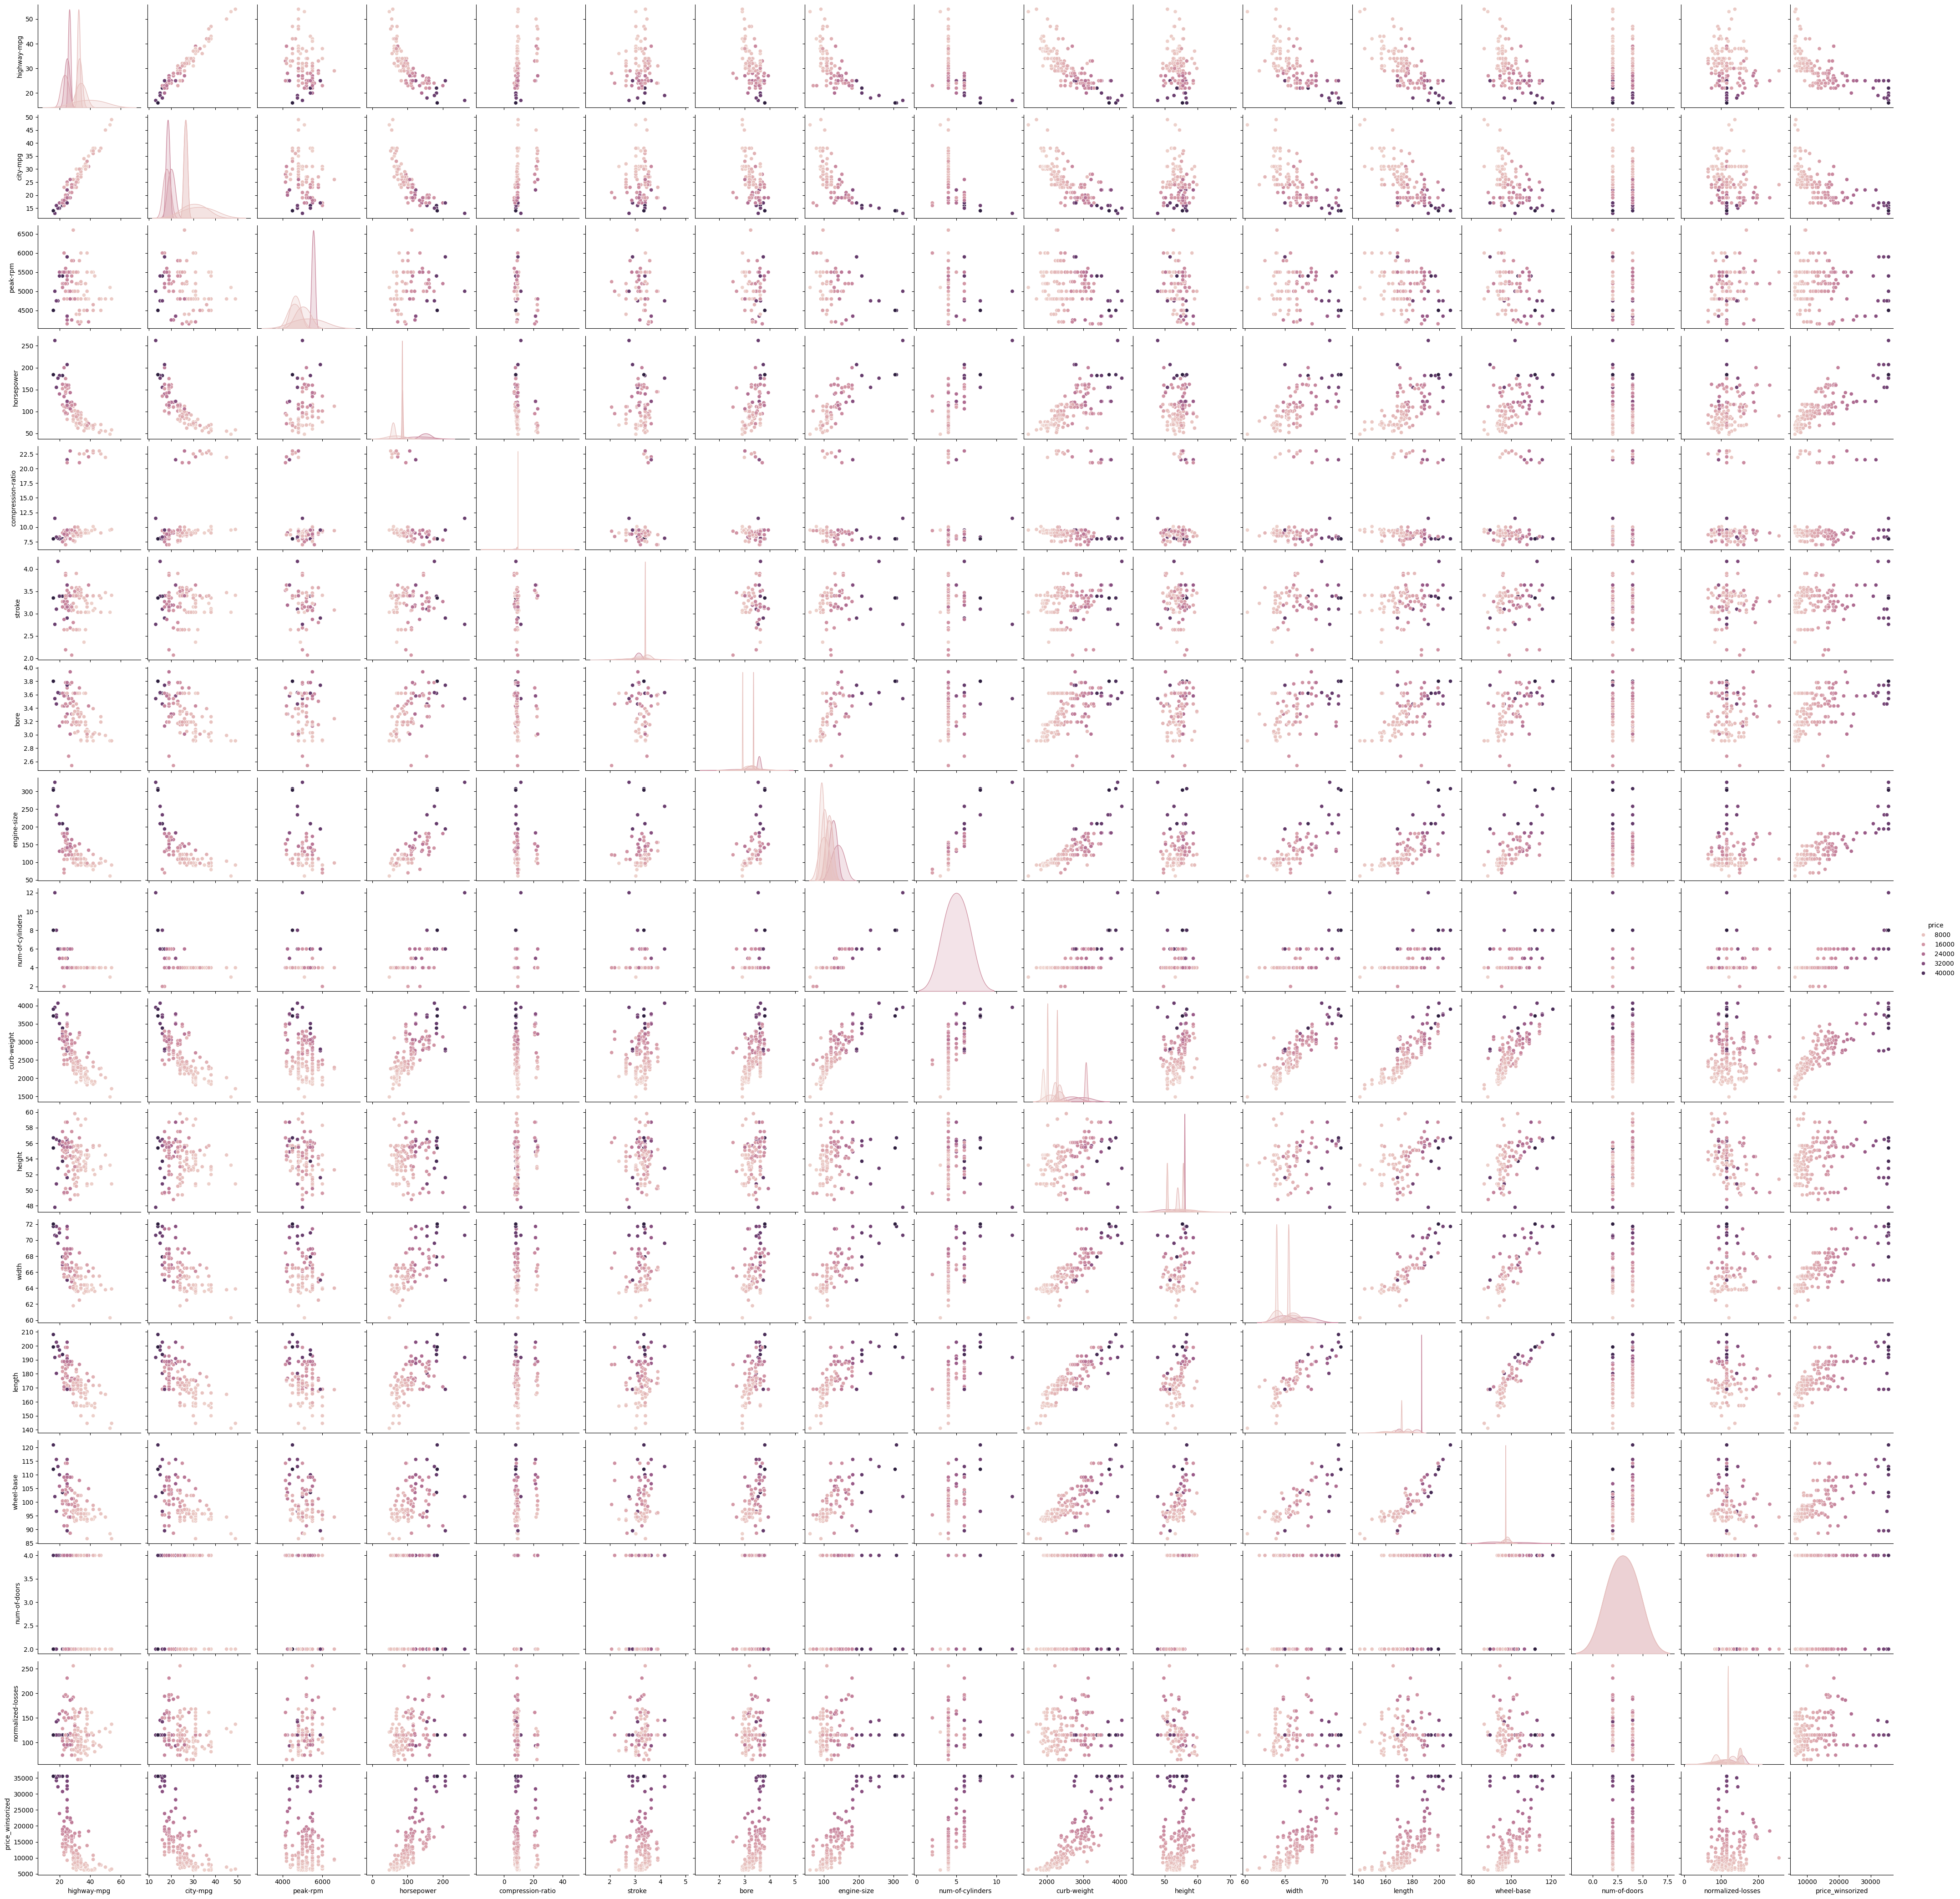

In [70]:
sns.pairplot(df, hue='price') # type: ignore

### 2. Preprocesamiento de Datos

Manejar los valores faltantes

In [134]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df['normalized-losses'] = imputer.fit_transform(df[['normalized-losses']])


/var/folders/xb/0grx1pzx4jj6d_p1s0vb1x000000gn/T/ipykernel_56644/2029308452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized-losses'] = imputer.fit_transform(df[['normalized-losses']])


In [135]:
imputer

SimpleImputer(strategy='median')

Dectectar outliers

In [136]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers = detect_outliers_iqr(df, 'price')
print("Outliers en precio:", outliers)

Outliers en precio:        price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
15   30760.0           22        16    5400.0       182.0                8.0   
16   41315.0           22        16    5400.0       182.0                8.0   
17   36880.0           20        15    5400.0       182.0                8.0   
47   32250.0           19        15    4750.0       176.0                8.1   
48   35550.0           19        15    4750.0       176.0                8.1   
49   36000.0           17        13    5000.0       262.0               11.5   
70   31600.0           25        22    4350.0       123.0               21.5   
71   34184.0           18        16    4750.0       155.0                8.3   
72   35056.0           18        16    4750.0       155.0                8.3   
73   40960.0           16        14    4500.0       184.0                8.0   
74   45400.0           16        14    4500.0       184.0                8.0   
126  32528.0        

Manejar outliers

In [137]:
from scipy.stats.mstats import winsorize

df['price_winsorized'] = winsorize(df['price'], limits=[0.05, 0.05])


In [76]:
df.head()

price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore fuel-system  engine-size  ...  wheel-base engine-location  \
0    2.68  3.47        mpfi          130  ...        88.6           front   
1    2.68  3.47        mpfi          130  ...        88.6           front   
2    3.47  2.68        mpfi          152  ...        94.5           front   
3    3.40  3.19        mpfi          109  ...        99.8           front   
4    3.40  3.19        mpfi          136  ...        99.4           front   

   drive-wheels   body-style  num-of-doors  aspiration  fuel-type  \
0           rwd  convertible           2.0         std        gas   
1           rwd  convertible           2.0         std        gas   
2           rwd    hatchback           2.0         std        gas   
3           fwd        sedan           4.0         std        gas   
4           4wd        sedan           4.0         std        gas   

          make normalized-losses price_winsorized  
0  alfa-romero             115.0          13495.0  
1  alfa-romero             115.0          16500.0  
2  alfa-romero             115.0          16500.0  
3         audi             164.0          13950.0  
4         audi             164.0          17450.0  

[5 rows x 26 columns]

Convertir las variables categóricas a numéricas mediante codificación (one-hot encoding)

In [138]:
from seaborn.axisgrid import pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(df[['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']))
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df.drop(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'], axis=1, inplace=True)

Estandarizar y normalizar las características según sea necesario

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']] = scaler.fit_transform(df[['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']])

In [79]:
df.head()

price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0    -0.546059 -0.646553 -0.262196    0.170228          -0.288349   
1  16500.0    -0.546059 -0.646553 -0.262196    0.170228          -0.288349   
2  16500.0    -0.691627 -0.953012 -0.262196    1.255637          -0.288349   
3  13950.0    -0.109354 -0.186865  0.783496   -0.056950          -0.035973   
4  17450.0    -1.273900 -1.106241  0.783496    0.271197          -0.540725   

     stroke      bore  engine-size  curb-weight  ...  num-of-cylinders_6  \
0 -1.821370  0.514000     0.074449    -0.014566  ...                 0.0   
1 -1.821370  0.514000     0.074449    -0.014566  ...                 0.0   
2  0.679195 -2.381285     0.604046     0.514882  ...                 1.0   
3  0.457626 -0.512177    -0.431076    -0.420797  ...                 0.0   
4  0.457626 -0.512177     0.218885     0.516807  ...                 0.0   

   num-of-cylinders_8  num-of-cylinders_12  fuel-system_2bbl  \
0                 0.0                  0.0               0.0   
1                 0.0                  0.0               0.0   
2                 0.0                  0.0               0.0   
3                 0.0                  0.0               0.0   
4                 0.0                  0.0               0.0   

   fuel-system_4bbl  fuel-system_idi  fuel-system_mfi  fuel-system_mpfi  \
0               0.0              0.0              0.0               1.0   
1               0.0              0.0              0.0               1.0   
2               0.0              0.0              0.0               1.0   
3               0.0              0.0              0.0               1.0   
4               0.0              0.0              0.0               1.0   

   fuel-system_spdi  fuel-system_spfi  
0               0.0               0.0  
1               0.0               0.0  
2               0.0               0.0  
3               0.0               0.0  
4               0.0               0.0  

[5 rows x 67 columns]

In [83]:
# Null validation
df.isnull().sum() 

price               4
highway-mpg         0
city-mpg            0
peak-rpm            2
horsepower          2
                   ..
fuel-system_idi     0
fuel-system_mfi     0
fuel-system_mpfi    0
fuel-system_spdi    0
fuel-system_spfi    0
Length: 67, dtype: int64

In [145]:
df.shape

(205, 67)

In [146]:
# Delete
df.dropna(inplace=True)
df.shape

(195, 67)

In [147]:
# Null validation
df.isnull().sum() 

price               0
highway-mpg         0
city-mpg            0
peak-rpm            0
horsepower          0
                   ..
fuel-system_idi     0
fuel-system_mfi     0
fuel-system_mpfi    0
fuel-system_spdi    0
fuel-system_spfi    0
Length: 67, dtype: int64

### 3. Modelado

Histograma de Caballos de fuerza por precio

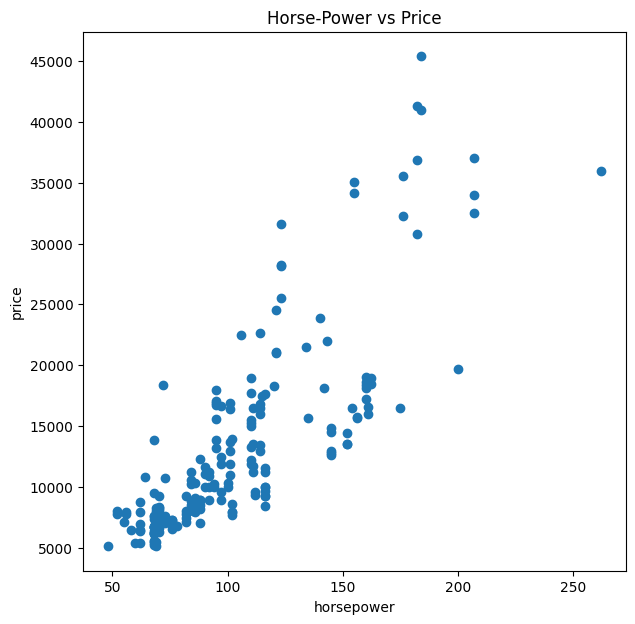

In [125]:
plt.figure(figsize=(7,7))
plt.scatter(df['horsepower'],df['price'])
plt.xlabel('horsepower')
plt.ylabel('price')
plt.title('Horse-Power vs Price')
plt.show()

Distribución de los precios

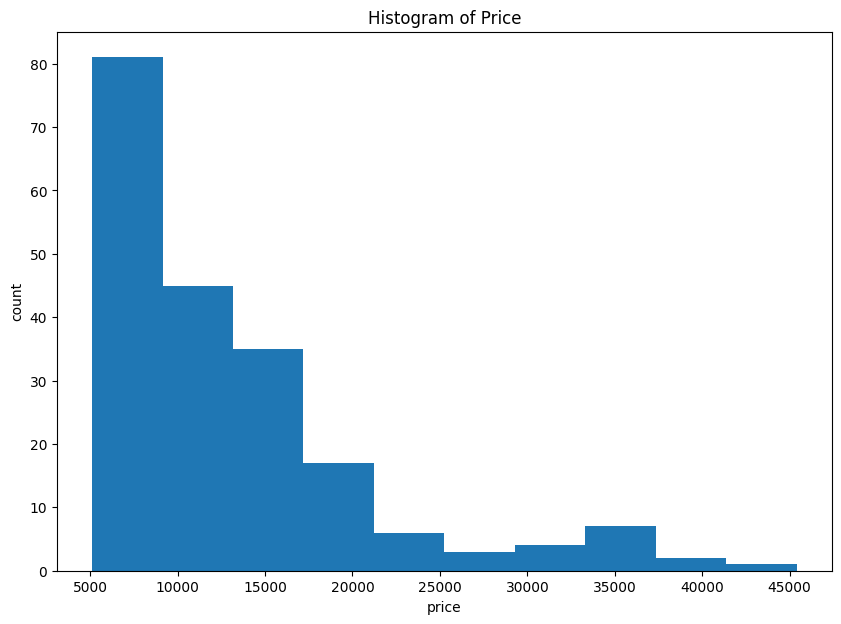

In [126]:
plt.figure(figsize=(10,7))
plt.hist(df['price'])
plt.xlabel('price')
plt.ylabel('count')
plt.title('Histogram of Price')
plt.show()

Dividir el dataset en conjunto de entrenamiento y conjunto de prueba

In [128]:
X, y = df['horsepower'].values, df['price'].values

In [142]:
X = X.reshape(-1,1)

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=0)

Probar al menos tres modelos de regresión distintos 

## Regresión lineal

Intercept:  -1.2997166790425843
Slope:  9.623096782647184e-05
Accuracy: 0.81
Percentage error: 100.50%


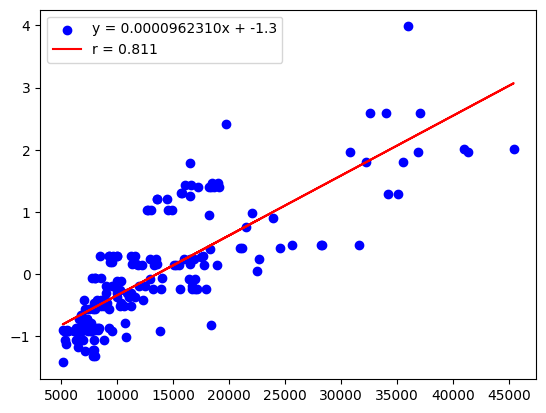

In [151]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

X = df[["price"]].values.flatten()
y = df["horsepower"].values.flatten()

if len(X) != len(y):
    raise ValueError("X and y must have the same length")

sum_x = sum(X)
sum_y = sum(y)
sum_xy = sum(X * (y - y.mean()))
sum_xx = sum(X* (X - X.mean()))

b = sum_xy / sum_xx
a = y.mean() - b * X.mean()

print("Intercept: ", a)
print("Slope: ", b)
print("Accuracy: {:.2f}".format(np.corrcoef(X, y)[0, 1] ))
print("Percentage error: {:.2f}%".format(mean_absolute_percentage_error(y, b * X + a) * 100))

plt.scatter(X, y, color="blue")
plt.plot(X, b * X + a, color="red")

plt.legend(
    [
        "y = {:.10f}x + {:.1f}".format(b, a),
        "r = {:.3f}".format(np.corrcoef(X, y)[0, 1]),
    ]
)
plt.show()

Intercept:  -1.363936892538512
Slope:  0.00010158379498500833
Accuracy: 0.811
percentage error: 103.93%


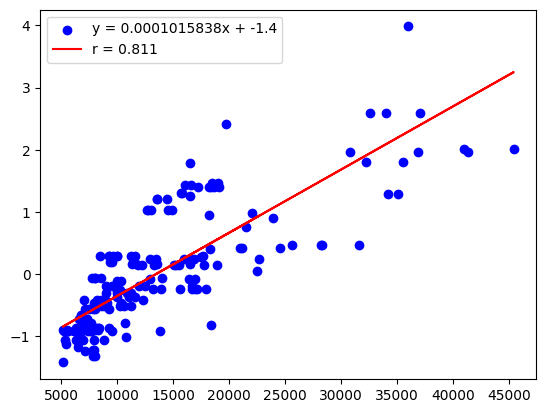

In [157]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

X = df[["price"]]
y = df["horsepower"]

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.80, test_size=0.20, random_state=0)

model.fit(X_train,y_train)

a= model.intercept_
b= model.coef_[0]

y_pred = model.predict(X)

print("Intercept: ", a)
print("Slope: ", b)
print("Accuracy: {:.3f}".format(np.corrcoef(X.values.flatten(), y.values.flatten())[0, 1]))
print("percentage error: {:.2f}%".format(mean_absolute_percentage_error(y, y_pred)*100))

plt.scatter(X, y, color="blue")
plt.plot(X, b * X + a, color="red")

plt.legend(
    [
        "y = {:.10f}x + {:.1f}".format(b, a),
        "r = {:.3f}".format(np.corrcoef(X.values.flatten(), y)[0, 1]),
    ]
)
plt.show()

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df['horsepower']
X = df.drop(columns=['horsepower'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.80, test_size=0.20, random_state=0)

if X_train.shape[0] != y_train.shape[0] or X_test.shape[0] != y_test.shape[0]:
    raise ValueError("X_train and y_train must have the same number of samples")

model = LinearRegression()
model.fit(X_train,y_train)

a = model.intercept_
b = model.coef_

y_pred = model.predict(X_test)

print("Intercept: ", a)

for i in range(len(b)):
    print("Slope for {}: {:.2f}".format(X.columns[i], b[i]))


print("Accuracy: {:.3f}".format(model.score(X_test, y_test)))
print("Percentage error: {:.2f}%".format(mean_absolute_percentage_error(y_test, y_pred)*100))


Intercept:  0.21420379532434153
Slope for price: -0.00
Slope for highway-mpg: 0.15
Slope for city-mpg: -0.17
Slope for peak-rpm: 0.12
Slope for compression-ratio: -1.17
Slope for stroke: -0.01
Slope for bore: -0.36
Slope for engine-size: 0.93
Slope for curb-weight: 0.21
Slope for height: -0.02
Slope for width: 0.12
Slope for length: 0.02
Slope for wheel-base: -0.07
Slope for normalized-losses: -0.03
Slope for price_winsorized: 0.00
Slope for make_audi: 0.83
Slope for make_bmw: 0.62
Slope for make_chevrolet: 0.59
Slope for make_dodge: 0.35
Slope for make_honda: 0.43
Slope for make_isuzu: 0.17
Slope for make_jaguar: 0.26
Slope for make_mazda: 0.33
Slope for make_mercedes-benz: 0.63
Slope for make_mercury: 1.29
Slope for make_mitsubishi: 0.30
Slope for make_nissan: 0.53
Slope for make_peugot: -0.66
Slope for make_plymouth: 0.22
Slope for make_porsche: 1.20
Slope for make_renault: -0.00
Slope for make_saab: 0.94
Slope for make_subaru: 0.14
Slope for make_toyota: 0.40
Slope for make_volkswa

In [159]:
for i in range(len(b)):
    print("Normalized slope for {}: {:.2f}".format(X.columns[i], b[i] * X_train[X.columns[i]].std() / y_train.std()))

Normalized slope for price: -0.11
Normalized slope for highway-mpg: 0.08
Normalized slope for city-mpg: -0.08
Normalized slope for peak-rpm: 0.13
Normalized slope for compression-ratio: -1.14
Normalized slope for stroke: 0.07
Normalized slope for bore: -0.08
Normalized slope for engine-size: 0.50
Normalized slope for curb-weight: 0.18
Normalized slope for height: -0.01
Normalized slope for width: 0.15
Normalized slope for length: -0.02
Normalized slope for wheel-base: -0.10
Normalized slope for normalized-losses: -0.01
Normalized slope for price_winsorized: 0.12
Normalized slope for make_audi: 0.03
Normalized slope for make_bmw: 0.00
Normalized slope for make_chevrolet: 0.01
Normalized slope for make_dodge: -0.05
Normalized slope for make_honda: -0.00
Normalized slope for make_isuzu: -0.03
Normalized slope for make_jaguar: -0.16
Normalized slope for make_mazda: -0.05
Normalized slope for make_mercedes-benz: -0.03
Normalized slope for make_mercury: 0.07
Normalized slope for make_mitsubi

Intercept:  -1.2997166790425843
Slope:  9.623096782647184e-05
Accuracy: 0.81
Percentage error: 100.50%


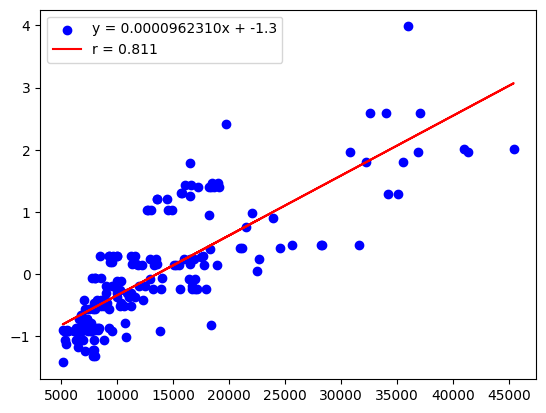

In [162]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

X = df[["price"]].values.flatten()
y = df["horsepower"].values.flatten()

if len(X) != len(y):
    raise ValueError("X and y must have the same length")

sum_x = sum(X)
sum_y = sum(y)
sum_xy = sum(X * (y - y.mean()))
sum_xx = sum(X* (X - X.mean()))

b = sum_xy / sum_xx
a = y.mean() - b * X.mean()

print("Intercept: ", a)
print("Slope: ", b)
print("Accuracy: {:.2f}".format(np.corrcoef(X, y)[0, 1] ))
print("Percentage error: {:.2f}%".format(mean_absolute_percentage_error(y, b * X + a) * 100))

plt.scatter(X, y, color="blue")
plt.plot(X, b * X + a, color="red")

plt.legend(
    [
        "y = {:.10f}x + {:.1f}".format(b, a),
        "r = {:.3f}".format(np.corrcoef(X, y)[0, 1]),
    ]
)
plt.show()

### Random Forest

In [166]:
print(f"Tamaño conjunto entrenamiento: {X_train.shape[0]}")
print(f"Tamaño conjunto test: {X_test.shape[0]}")

Tamaño conjunto entrenamiento: 156
Tamaño conjunto test: 39


In [167]:
from sklearn.ensemble import RandomForestRegressor


modelo = RandomForestRegressor(  n_estimators = 10,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 1,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

modelo.fit(X_train, y_train)

RandomForestRegressor(max_features=1, n_estimators=10, n_jobs=-1,
                      random_state=123)

In [169]:
from sklearn.metrics import root_mean_squared_error

predicciones = modelo.predict(X=X_test)
rmse = root_mean_squared_error(y_true=y_test, y_pred=predicciones) # type: ignore
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1579.8209407625268


Utilizar técnicas de cross-validación para evaluar los modelos

Valor óptimo de n_estimators: 146


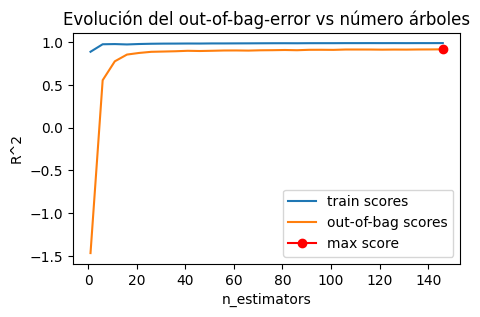

In [170]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
from seaborn.axisgrid import warnings


warnings.filterwarnings('ignore')
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 1,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")
warnings.filterwarnings('default')

Valor óptimo de n_estimators: 146


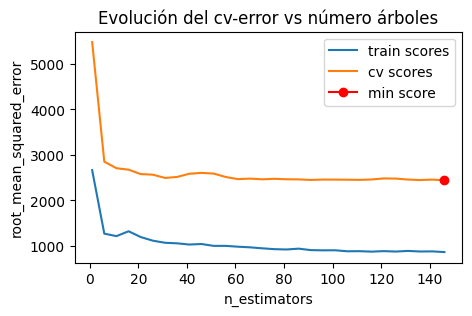

In [171]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score

train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 1,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de entrenamiento
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X=X_train)
    rmse = root_mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Valor óptimo de max_features: 65


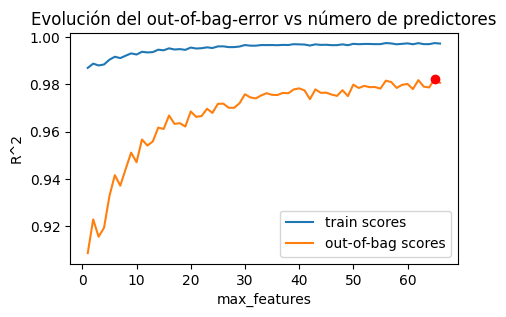

In [172]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

Valor óptimo de max_features: 59


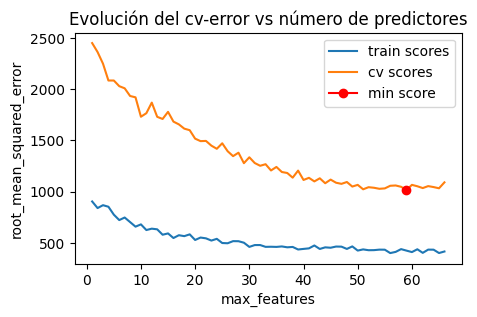

In [173]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error

train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = root_mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

In [175]:
# Grid de hiperparámetros evaluados
# ==============================================================================
from sklearn.model_selection import ParameterGrid

param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} ✓")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 9, 'n_estimators': 150} ✓


oob_r2  max_depth  max_features  n_estimators
2   0.948737        NaN           9.0         150.0
11  0.948737       20.0           9.0         150.0
8   0.947716       10.0           9.0         150.0
7   0.944439       10.0           7.0         150.0

In [178]:
# Grid de hiperparámetros evaluados
# ==============================================================================
from joblib import Parallel, delayed, cpu_count

param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop paralelizado para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
def eval_oob_error(X, y, params, verbose=True):
    """
    Función para entrenar un modelo utilizando unos parámetros determinados
    y que devuelve el out-of-bag error
    """
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params            
            )
    
    modelo.fit(X, y)
    
    if verbose:
        print(f"Modelo: {params} ✓")
        
    return{'params': params, 'oob_r2': modelo.oob_score_}

resultados = Parallel(n_jobs=cpu_count()-1)( # type: ignore
                delayed(eval_oob_error)(X_train, y_train, params) # type: ignore
                for params in param_grid
             )

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)


Modelo: {'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 9, 'n_estimators': 150} ✓


oob_r2  max_depth  max_features  n_estimators
2   0.948737        NaN           9.0         150.0
11  0.948737       20.0           9.0         150.0
8   0.947716       10.0           9.0         150.0
7   0.944439       10.0           7.0         150.0

In [179]:
# Mejores hiperparámetros por out-of-bag error
# ==============================================================================
print("--------------------------------------------")
print("Mejores hiperparámetros encontrados (oob-r2)")
print("--------------------------------------------")
print(resultados.iloc[0,0:])

--------------------------------------------
Mejores hiperparámetros encontrados (oob-r2)
--------------------------------------------
oob_r2            0.948737
max_depth              NaN
max_features      9.000000
n_estimators    150.000000
Name: 2, dtype: float64


In [181]:
# Grid de hiperparámetros evaluados
# ==============================================================================
from sklearn.model_selection import GridSearchCV, RepeatedKFold


param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
            estimator  = RandomForestRegressor(random_state = 123),
            param_grid = param_grid,
            scoring    = 'neg_root_mean_squared_error',
            n_jobs     = cpu_count() - 1,
            cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
            refit      = True,
            verbose    = 0,
            return_train_score = True
       )

grid.fit(X=X_train, y=y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

param_max_depth  param_max_features  param_n_estimators  mean_test_score  \
2               NaN                   9                 150     -1893.334645   
11             20.0                   9                 150     -1893.334645   
8              10.0                   9                 150     -1910.573506   
1               NaN                   7                 150     -2084.933188   

    std_test_score  mean_train_score  std_train_score  
2       599.954586       -746.215251        72.811122  
11      599.954586       -746.215251        72.811122  
8       561.215351       -763.720860        74.342213  
1       624.898221       -804.452400        70.752279

In [182]:
# Mejores hiperparámetros encontrados mediante validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': None, 'max_features': 9, 'n_estimators': 150} : -1893.334644535474 neg_root_mean_squared_error


In [183]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X=X_test)
rmse = root_mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 959.971867982869


### Gradient Boosting

In [186]:
# Creación del modelo
# ==============================================================================
from sklearn.ensemble import HistGradientBoostingRegressor

modelo = HistGradientBoostingRegressor(
            max_iter     = 10,
            loss         = 'squared_error',
            random_state = 123
         )

modelo.fit(X_train, y_train)

HistGradientBoostingRegressor(max_iter=10, random_state=123)

In [187]:
#  Predicción y evaluación del modelo
#  Error de test del modelo inicial
# ==============================================================================
from sklearn.metrics import mean_squared_error

predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

accuracy = modelo.score(X_test, y_test)

print("Accuracy: {:.3f}".format(accuracy))

El error (rmse) de test es: 4078.539020824619
Accuracy: 0.766


/Users/carlosortega/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


/Users/carlosortega/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/carlosortega/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/carlosortega/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/carlosortega/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarnin

Valor óptimo de n_estimators: 101


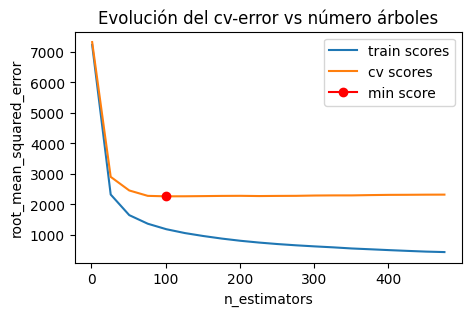

In [188]:
# Optimización de hiperparámetros: Número de árboles
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
import multiprocessing

train_scores = []
cv_scores    = []

# Valores evaluados
max_iter_range = range(1, 500, 25)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for max_iter in max_iter_range:

    modelo = HistGradientBoostingRegressor(
                max_iter     = max_iter,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)

    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5,
                n_jobs    = multiprocessing.cpu_count() - 1,
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(max_iter_range, train_scores, label="train scores")
ax.plot(max_iter_range, cv_scores, label="cv scores")
ax.plot(max_iter_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {max_iter_range[np.argmin(cv_scores)]}")

/Users/carlosortega/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/carlosortega/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/carlosortega/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/carlosortega/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarnin

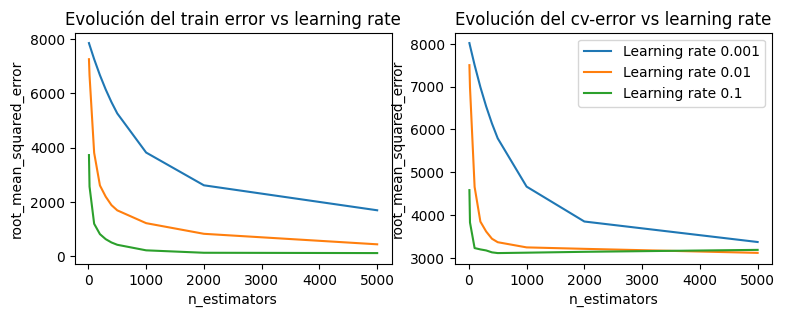

In [189]:
# Optimización de hiperparámetros: Learning rate
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
resultados = {}

# Valores evaluados
learning_rates_grid = [0.001, 0.01, 0.1]
max_iter_grid   = [10, 20, 100, 200, 300, 400, 500, 1000, 2000, 5000]


# Bucle para entrenar un modelo con cada combinacion de  learning_rate y n_estimator
# y extraer su error de entrenamiento y k-cross-validation.
for learning_rate in learning_rates_grid:
    train_scores = []
    cv_scores    = []

    for n_estimator in max_iter_grid:

        modelo = HistGradientBoostingRegressor(
                    max_iter      =  n_estimator,
                    learning_rate = learning_rate,
                    random_state  = 123
                 )

        # Error de train
        modelo.fit(X_train, y_train)
        predicciones = modelo.predict(X = X_train)
        rmse = mean_squared_error(
                y_true  = y_train,
                y_pred  = predicciones,
                squared = False
               )
        train_scores.append(rmse)

        # Error de validación cruzada
        scores = cross_val_score(
                    estimator = modelo,
                    X         = X_train,
                    y         = y_train,
                    scoring   = 'neg_root_mean_squared_error',
                    cv        = 3,
                    n_jobs    = multiprocessing.cpu_count() - 1
                 )
        # Se agregan los scores de cross_val_score() y se pasa a positivo
        cv_scores.append(-1*scores.mean())

    resultados[learning_rate] = {'train_scores': train_scores, 'cv_scores': cv_scores}

# Gráfico con la evolución de los errores de entrenamiento
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))

for key, value in resultados.items():
    axs[0].plot(max_iter_grid, value['train_scores'], label=f"Learning rate {key}")
    axs[0].set_ylabel("root_mean_squared_error")
    axs[0].set_xlabel("n_estimators")
    axs[0].set_title("Evolución del train error vs learning rate")

    axs[1].plot(max_iter_grid, value['cv_scores'], label=f"Learning rate {key}")
    axs[1].set_ylabel("root_mean_squared_error")
    axs[1].set_xlabel("n_estimators")
    axs[1].set_title("Evolución del cv-error vs learning rate")
    plt.legend();

/Users/carlosortega/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/carlosortega/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/carlosortega/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/carlosortega/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarnin

Valor óptimo de max_depth: 3


/Users/carlosortega/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


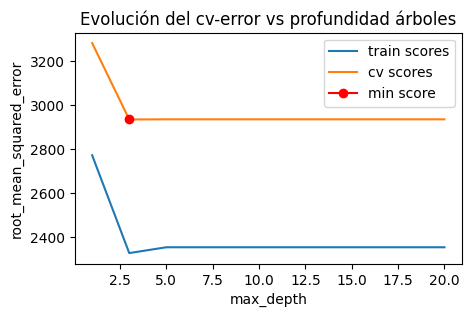

In [190]:
# Optimización de hiperparámetros: Max depth
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_depths = [1, 3, 5, 10, 20]

# Bucle para entrenar un modelo con cada valor de max_depth y extraer su error
# de entrenamiento y de k-cross-validation.
for max_depth in max_depths:

    modelo = HistGradientBoostingRegressor(
                max_iter     = 25,
                max_depth    = max_depth,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)

    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5,
                n_jobs    = multiprocessing.cpu_count() - 1
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(max_depths, train_scores, label="train scores")
ax.plot(max_depths, cv_scores, label="cv scores")
ax.plot(max_depths[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_depth")
ax.set_title("Evolución del cv-error vs profundidad árboles")
plt.legend();
print(f"Valor óptimo de max_depth: {max_depths[np.argmin(cv_scores)]}")

In [191]:
# Grid Search basado en validación cruzada
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'loss'             : ['squared_error', 'absolute_error'],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'max_depth'        : [3, 5, 10, 20],
              'l2_regularization': [0, 1, 10]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = HistGradientBoostingRegressor(
                        max_iter            = 1000,
                        random_state        = 123,
                        # Activación de la parada temprana
                        early_stopping      = True,
                        validation_fraction = 0.1,
                        n_iter_no_change    = 10,
                        tol                 = 1e-7,
                        scoring             = 'loss',
                    ),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123),
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

param_l2_regularization  param_learning_rate     param_loss  \
40                        1                  0.1  squared_error   
43                        1                  0.1  squared_error   
42                        1                  0.1  squared_error   
41                        1                  0.1  squared_error   

    param_max_depth  mean_test_score  std_test_score  mean_train_score  \
40                3     -3477.247227      693.478817       -2628.33375   
43               20     -3477.247227      693.478817       -2628.33375   
42               10     -3477.247227      693.478817       -2628.33375   
41                5     -3477.247227      693.478817       -2628.33375   

    std_train_score  
40       985.955397  
43       985.955397  
42       985.955397  
41       985.955397

In [192]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'l2_regularization': 1, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3} : -3477.2472271626534 neg_root_mean_squared_error


In [193]:
# Número de árboles del modelo final (early stopping)
# ==============================================================================
print(f"Número de árboles del modelo: {grid.best_estimator_.n_iter_}")

Número de árboles del modelo: 241


In [194]:
# modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
modelo_final

HistGradientBoostingRegressor(early_stopping=True, l2_regularization=1,
                              max_depth=3, max_iter=1000, random_state=123)

In [195]:
# Error de test del modelo final
# ==============================================================================
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1997.538909739891


/Users/carlosortega/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [196]:
# Accuracy de test del modelo final
# ==============================================================================
accuracy = modelo_final.score(X_test, y_test)
print(f"La precisión del modelo es: {accuracy}")

La precisión del modelo es: 0.9437796096856255


### 4. Evaluación

Evaluar el desempeño de los modelos utilizando métricas apropiadas (RMSE, MAE, R²)


In [165]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dividir en conjunto de entrenamiento y prueba
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=0)

# Modelos a probar
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Cross-validation y optimización de hiperparámetros
for name, model in models.items():
    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"\n{name} - RMSE (Cross-Validation): {rmse_scores.mean():.2f} (+/- {rmse_scores.std():.2f})")

    # Optimización de hiperparámetros (ejemplo con Random Forest)
    if name == 'Random Forest':
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"\nMejores hiperparámetros para {name}: {grid_search.best_params_}")
    else:
        best_model = model

    # Entrenar el mejor modelo y evaluar en el conjunto de prueba
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name} - Resultados en conjunto de prueba:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R²: {r2:.2f}")


Linear Regression - RMSE (Cross-Validation): 1787.73 (+/- 895.36)

Linear Regression - Resultados en conjunto de prueba:
  RMSE: 2325.65
  MAE: 985.44
  R²: 0.92

Random Forest - RMSE (Cross-Validation): 1080.06 (+/- 462.46)

Mejores hiperparámetros para Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

Random Forest - Resultados en conjunto de prueba:
  RMSE: 718.46
  MAE: 304.01
  R²: 0.99

Gradient Boosting - RMSE (Cross-Validation): 1196.49 (+/- 412.12)

Gradient Boosting - Resultados en conjunto de prueba:
  RMSE: 835.90
  MAE: 306.21
  R²: 0.99


Comparar los resultados y seleccionar el mejor modelo basado en las métricas de desempeño

### Mejor modelo

Gradient Boosting - RMSE (Cross-Validation): 1196.49 (+/- 412.12)

Gradient Boosting - Resultados en conjunto de prueba: 
  RMSE: 835.90
  MAE: 306.21
  R²: 0.99


Nota: Se elige el modelo con el menor RMSE en el conjunto de prueba y la menor variabilidad en la validación cruzada